# Customer Churn in a Bank

### Attempting to ascertain if a customer would stay with the bank or leave

#### Data Description:
- RowNumber: Row Serial number
- CustomerID: Customer Unique Identifier
- Surname: Customer Last name
- CreditScore: Customer Credit Score
- Geography: Conuntry where the Customer lives
- Gender: Customer Gender
- Age: Customer Age
- Tenure: Tenure with Bank
- Balance: Account Balance
- NumOfProducts: Number of bank products customer is using
- HasCrCard: Has a credit card (0 = No, 1 = Yes)
- IsActiveMember: Is an active member (0 = No, 1 = Yes)
- EstimatedSalary: Estimated Salary
- Exited: Exited Bank (0 = No, 1 = Yes

### Since our Target variable has a binary classification (0 and 1), this problem will need to be solved using a Classification Algorithm.

#### We will use below algorithms:
- Logistic Regression
- Gaussian naïve Bayes
- k-nearest neighbors
- Decision tree
- Random forest
- XGBoost

### **Importing required Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)


from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

Matplotlib is building the font cache; this may take a moment.


### **Importing data into a DataFrame & checking the import data**

In [2]:
df = pd.read_csv('Bank_churn_modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


This data set does not seem to have any missing values. We will not neeed to do any data imputation.
#### Dropping the 'RowNumber' column

Since the 'RowNumber' column is a number, there is a possibility that the model will consider it relevant in the prediction of the output and this can possibly skew the data. Hence, we will drop this column.

In [4]:
df = df.drop(['RowNumber'], axis = 1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We will now try and find the correlation among the variables in the dataframe using the ``DataFrame.corr()`` function.
<br>
This function uses the **Pearson** method.
For the purpose of this matrix, we will remove the **'CustomerId'** for the same reason as we why dropped **'RowNumber'** column

In [5]:
df.drop(['CustomerId'], axis = 1).corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


#### Visualising the above correlation matrix

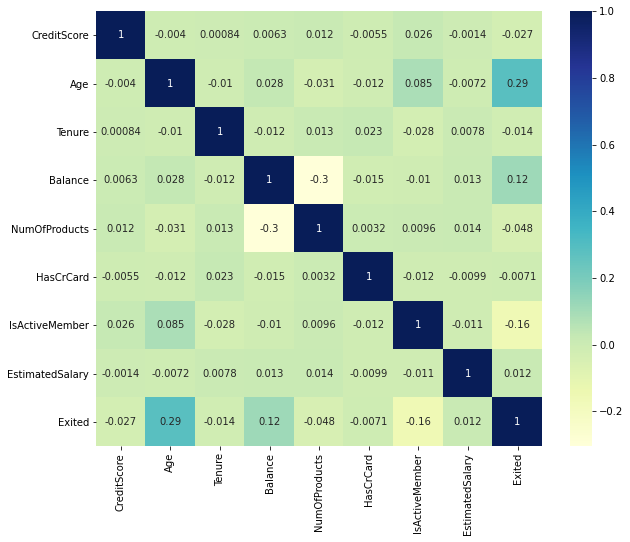

In [6]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.drop(['CustomerId'], axis = 1).corr(), annot = True, cmap = 'YlGnBu')
plt.show()

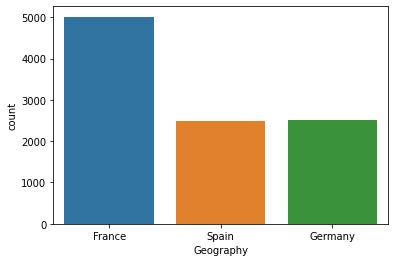

In [7]:
ax = sns.countplot(x = 'Geography', data=df)

France has the highest number of customers. Remaining are equally split between Spain and Germany.
<br>
Trying to check if there is any relationship between **'Geography'** and **'CreditScore'**.

<AxesSubplot:xlabel='Geography', ylabel='CreditScore'>

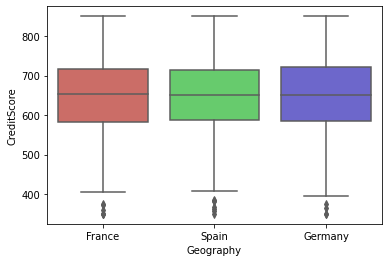

In [8]:
sns.boxplot(x = 'Geography', y = 'CreditScore', data = df, palette = 'hls')

Country does not seem to have any bearing on the Credit Score of the customers.
<br>
We will now check the relationship between **'Age'**, **'Gender'** and whether that has any relationship with customers **'Exiting'**.

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 1.0, 'Male')

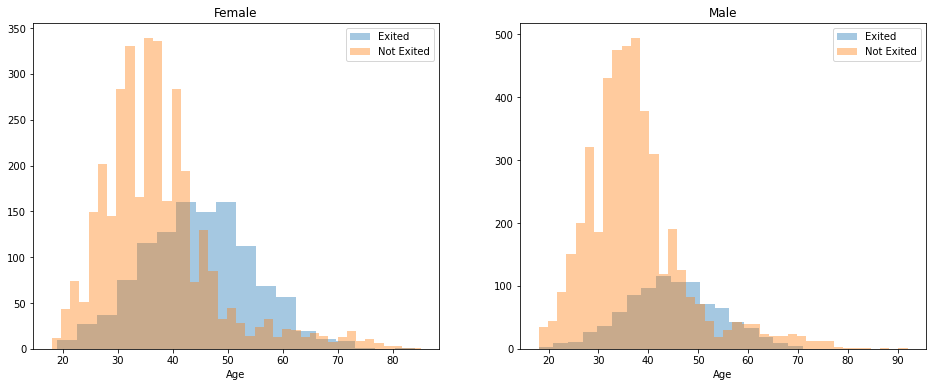

In [9]:
exited = 'Exited'
not_exited = 'Not Exited'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

male = df[df['Gender']=='Male']
female = df[df['Gender']=='Female']

ax = sns.distplot(female[female['Exited']==1].Age, bins = 18, label = exited, ax = axes[0], kde = False)
ax = sns.distplot(female[female['Exited']==0].Age, bins = 40, label = not_exited, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Exited']==1].Age, bins = 18, label = exited, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Exited']==0].Age, bins = 40, label = not_exited, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall')

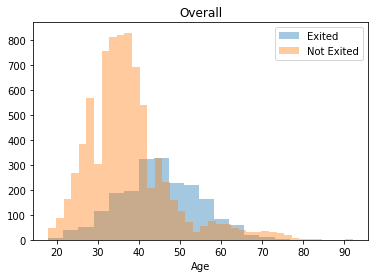

In [10]:
ax = sns.distplot(df[df['Exited']==1].Age, bins = 18, label = exited, kde = False)
ax = sns.distplot(df[df['Exited']==0].Age, bins = 40, label = not_exited, kde = False)
ax.legend()
ax.set_title('Overall')

While the **'Gender'** of the customer seems to be a factor, **'Age'** also seems to be a contributing factor.
<br>
Older customer are more prone to exit than younger customers. More older Female customers are at risk of leaving the bank compared to older Male customers. 

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

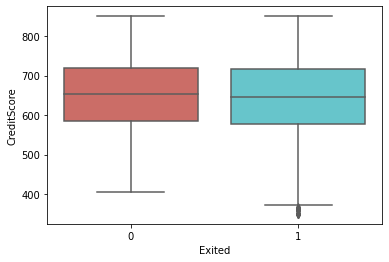

In [11]:
sns.boxplot(x='Exited',y='CreditScore',data=df,palette='hls')

Above box plot indicates that the credit score of a customer is not a significant factor in their Exit.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

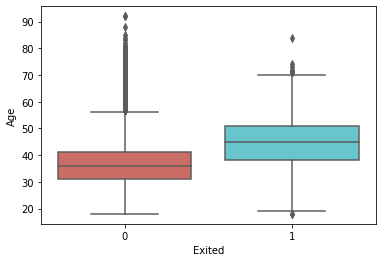

In [12]:
sns.boxplot(x='Exited',y='Age',data=df,palette='hls')

The Age of a customer is again proving to be significant. The older a customer is, there is a higher change that they would exit the bank. Let's explore this further.

<AxesSubplot:xlabel='Age', ylabel='Balance'>

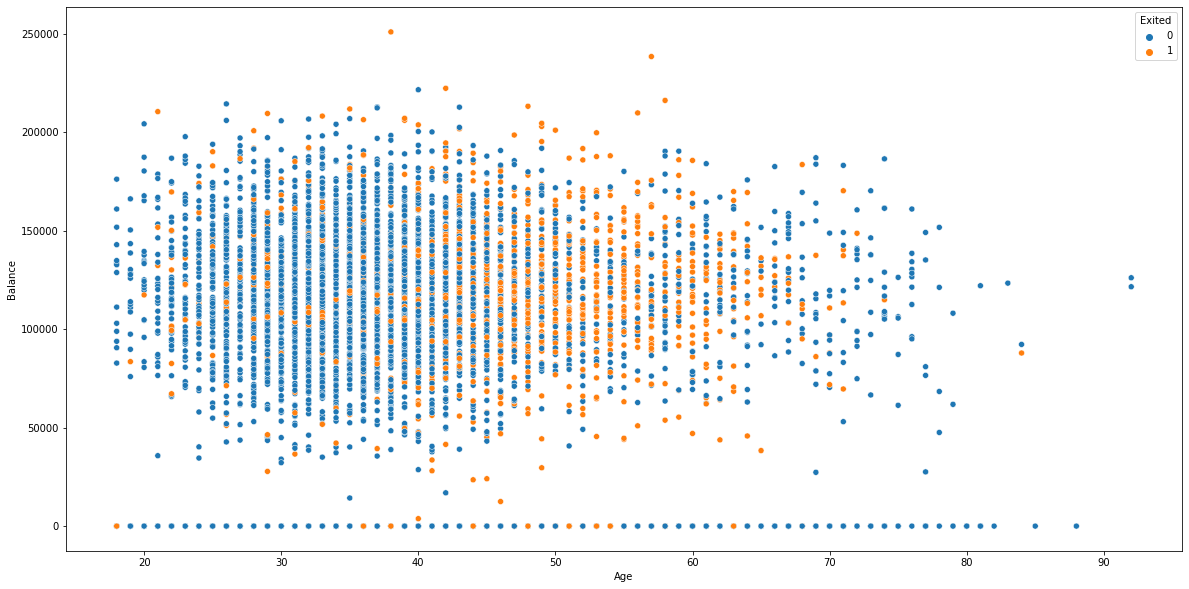

In [13]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Exited')

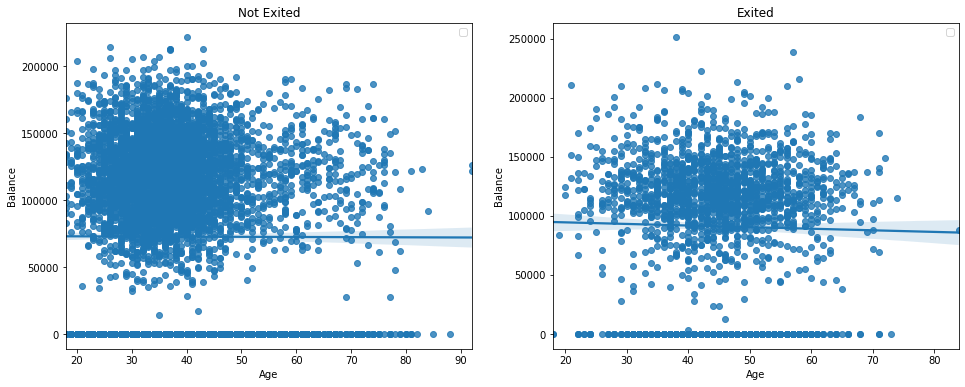

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))

exiting = df[df['Exited']==1]
staying = df[df['Exited']==0]

ax = sns.regplot(x="Age", y="Balance", data=staying, ax = axes[0])
ax.legend()
ax.set_title('Not Exited')

ax = sns.regplot(x="Age", y="Balance", data=exiting, ax = axes[1])
ax.legend()
ax.set_title('Exited')

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

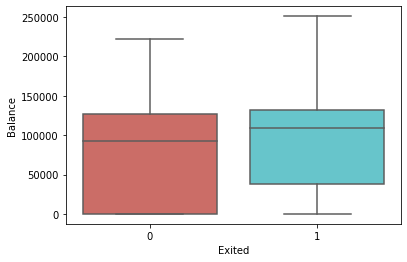

In [15]:
sns.boxplot(x='Exited',y='Balance',data=df,palette='hls')

Based of a visual assessment of the above three plots, it seems that if a customer is more senior in age and their mean balance is higher, they would have a higher chance of exiting the bank. The customers staying are comparatively younger.

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

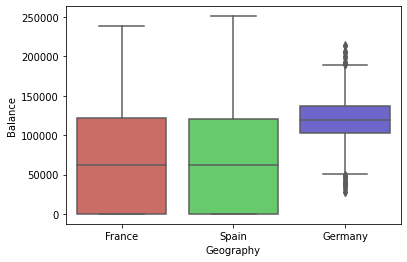

In [16]:
sns.boxplot(x='Geography',y='Balance',data=df,palette='hls')

Customers in Germany have a better avergage balance maintained than those in France and Spain.

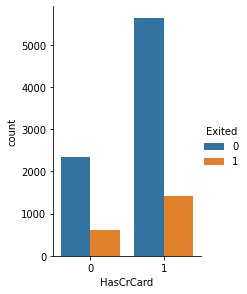

In [17]:
g = sns.catplot(x='HasCrCard', hue='Exited',data=df, kind='count',height=4, aspect=.7)

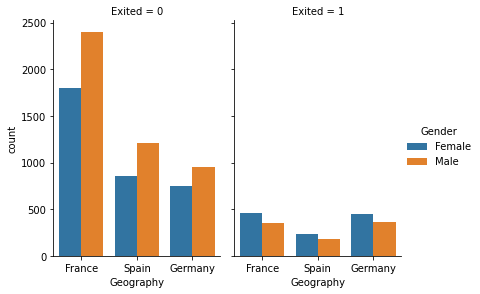

In [18]:
g = sns.catplot(x='Geography', hue='Gender', col='Exited',data=df, kind='count',height=4, aspect=.7)

As we can see fewer males have exited, compared to females. Gender seems to a factor in the churn. This seems to be an observation across the three geographies.

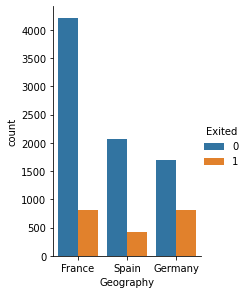

In [19]:
g = sns.catplot(x='Geography', hue='Exited',data=df, kind='count',height=4, aspect=.7)

While Germany and Spain have equal number of customers, higher percentage of German customers seem to be leaving the bank compared to Spain and France. Geography seems to be a factor in customer churn.

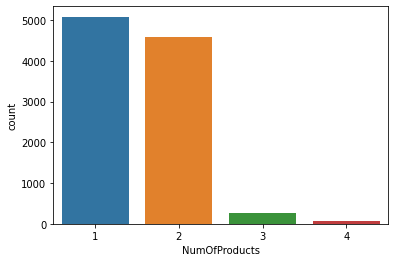

In [20]:
ax = sns.countplot(x="NumOfProducts", data=df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

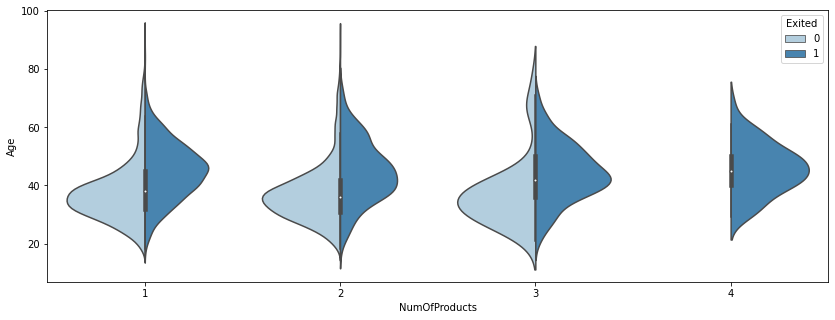

In [21]:
plt.figure(figsize=(14,5))
sns.violinplot(x='NumOfProducts',y='Age',hue='Exited',data=df,palette='Blues', split=True)

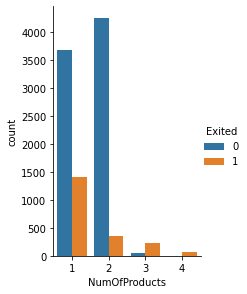

In [22]:
g = sns.catplot(x='NumOfProducts', hue='Exited', data=df, kind='count',height=4, aspect=.7)

When checking number of products purchased by customer who have stayed, it shows the customers who have been sold/are using more than two products are more at risk of leaving. So upselling/cross-selling beyond two products might not be a good idea. While the number of such customers is comparatively lower, they are still at risk of leaving the bank.

Bank should target selling only 2 products to the customers. Any more or less can lead to customer attrition.

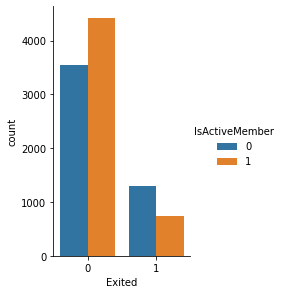

In [23]:
g = sns.catplot(x='Exited', hue='IsActiveMember',data=df, kind='count',height=4, aspect=.7)

As we can see, people who are not active members are more prone to exit.

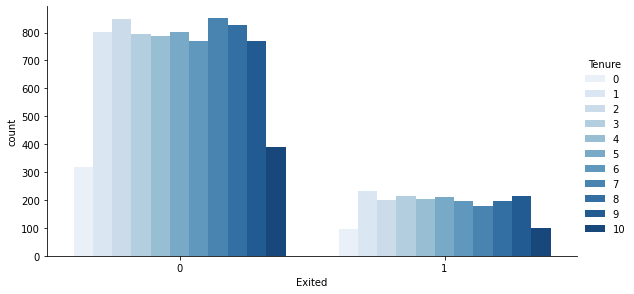

In [24]:
plt.figsize=(10, 6)
sns.catplot(x='Exited', hue='Tenure',data=df, kind='count', palette="Blues", height=4, aspect=2)

<AxesSubplot:xlabel='Exited', ylabel='count'>

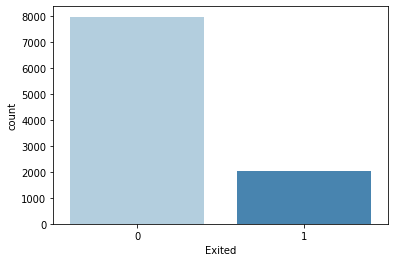

In [25]:
sns.countplot(x="Exited", data=df, palette="Blues")

When comparing the distribution of Customers Exited by Tenure, we can see that tenure of customers is not a significant factor in customer exiting.

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

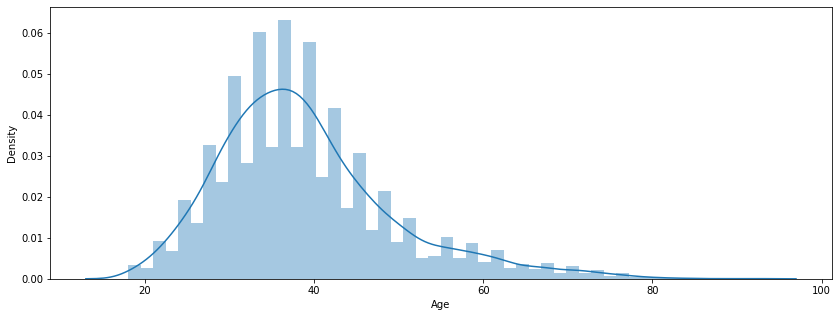

In [26]:
plt.figure(figsize=(14,5))
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

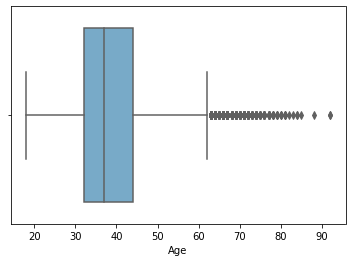

In [27]:
 sns.boxplot(x='Age',data=df,palette='Blues')

Since Age is a factor in exit of customers, there seem to be a few outliers in the data as seen the above box plot. In this scenario since this is a banking dataset, banks usually have senior customers. These customers are important to the bank as you have seen that older customers tend to have a higher bank balance. We will leave this in for this scenario.

Outliers can adversely impact the performance of the model. If performance of the model is not satisfactory, a potential remedy can to be remove the outliers.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

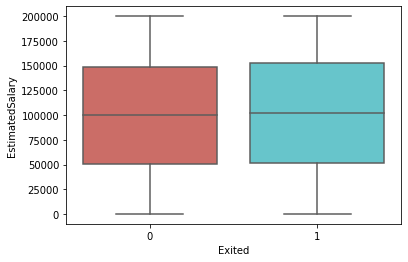

In [28]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=df,palette='hls')

As we can see from the above plot, the distribution of salary of customers that have exited and those that have not, seems to quite similar. Salary does not seem to be an important factor in the exit of customers.

### So based on our Exploratory Data Anaysis, we have identfied below variables as features for our model:
- RowNumber: Serial Number
- CustomerId: Customer Unique identifier
- Surname: Customer Last Name
- CreditScore - Not Relevant
- Geography - Relevant
- Gender - Relevant
- Age - Relevant
- Tenure - Not Relevant
- Balance - Relevant
- NumOfProducts - Relevant
- HasCrCard - Not Relevant
- IsActiveMember - Relevant
- EstimatedSalary - Not Relevant
- Exited - Dependant variable


# Building the Model

## Step 1: One Hot Encoding

Since algorithms understand only numbers, we will convert the categorical variable into binary using get_dummies method.

In [29]:
df_cat = pd.get_dummies(df[['Geography','Gender']])
df_cat.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


Selecting the remaining relevant features into another column.

In [30]:
df_num = df[['Age','Balance','NumOfProducts','IsActiveMember']]
df_num.head()

,Age,Balance,NumOfProducts,IsActiveMember
0,42,0.00,1,1
1,41,83807.86,1,1
2,42,159660.80,3,0
3,39,0.00,2,0
4,43,125510.82,1,1


Merging the numeric and categorical data back again and forming a DataFrame of only Feature or Independent Variables and storing this data in variable **X**

In [31]:
X = df_cat.join(df_num)

Creating an array containing Target or Dependent variable and storing this in variable **y**

In [32]:
y = df['Exited']

Checking the Shape or Dimensions of **X**

In [33]:
X.shape

(10000, 9)

Checking the Shape or Dimensions of **y**

In [34]:
y.shape

(10000,)

Splitting our X and y data into Train and Test data

In [35]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, stratify = y)

Checking the Shape or Dimensions of our newly created **X_train**, **X_test**, **y_train** and **y_test**
<br>
Using ``stratify`` ensure that the percentage of customer Exiting and Not Exiting are split evenly between Train and Test data.

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 9)
(3000, 9)
(7000,)
(3000,)


# Step 2: Fitting the Algorithms and Evaluating Model Performance

We will now pass our **X_train** and **y_train** data through the different Classification algorithms. Each algorithm tries to **fit** the train and test data and understand the relationship between all the independent variables in the train dataset (**X**) how it affects the target variable (**y**).

It then uses this ``fit`` to ``predict`` the target outcome based on independent variables supplied to it.

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes. A model that is overfitted matches the data too closely and might fail to generalise when exposed to unknown data. A model that is underfitted doesn’t match closely enough.

We then capture various evaulation metrics for each algorithm for comparison later

We will also visualise in a **Confusion Matrix** also known as an error matrix. This allows visualization of the performance of an algorithm.

### More information on Confusion Matrix
https://en.wikipedia.org/wiki/Confusion_matrix
<br>
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
<br>
https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/



# Logistic Regression

In [37]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)

acc_log = round(lr.score(X_train, y_train) * 100, 2)
prec_log = round(precision_score(y_train,y_pred) * 100,2)
recall_log = round(recall_score(y_train,y_pred) * 100,2)
f1_log = round(f1_score(y_train,y_pred) * 100,2)
roc_auc_log = round(roc_auc_score(y_train,y_pred) * 100,2)

y_pred_test = lr.predict(X_test)

acc_log_test = round(lr.score(X_test, y_test) * 100, 2)
prec_log_test = round(precision_score(y_test,y_pred_test) * 100,2)
recall_log_test = round(recall_score(y_test,y_pred_test) * 100,2)
f1_log_test = round(f1_score(y_test,y_pred_test) * 100,2)
roc_auc_log_test = round(roc_auc_score(y_test,y_pred_test) * 100,2)

In [38]:
print(acc_log)
print(prec_log)
print(recall_log)
print(f1_log)
print(roc_auc_log)

20.37
20.37
100.0
33.85
50.0


<AxesSubplot:>

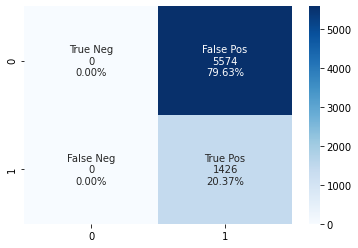

In [39]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()/np.sum(confusion_matrix(y_train, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=labels, fmt='', cmap='Blues')

# Gaussian naïve Bayes

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_train)

acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
prec_gnb = round(precision_score(y_train,y_pred) * 100,2)
recall_gnb = round(recall_score(y_train,y_pred) * 100,2)
f1_gnb = round(f1_score(y_train,y_pred) * 100,2)
roc_auc_gnb = round(roc_auc_score(y_train,y_pred) * 100,2)

y_pred_test = gnb.predict(X_test)

acc_gnb_test = round(gnb.score(X_test, y_test) * 100, 2)
prec_gnb_test = round(precision_score(y_test,y_pred_test) * 100,2)
recall_gnb_test = round(recall_score(y_test,y_pred_test) * 100,2)
f1_gnb_test = round(f1_score(y_test,y_pred_test) * 100,2)
roc_auc_gnb_test = round(roc_auc_score(y_test,y_pred_test) * 100,2)

In [41]:
print(acc_gnb)
print(prec_gnb)
print(recall_gnb)
print(f1_gnb)
print(roc_auc_gnb)

78.44
36.99
8.27
13.52
52.33


<AxesSubplot:>

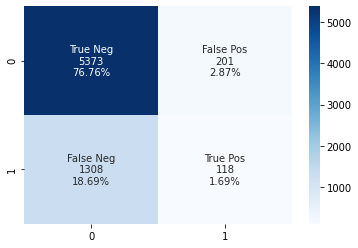

In [42]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()/np.sum(confusion_matrix(y_train, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=labels, fmt='', cmap='Blues')

# k-nearest neighbors (KNN)

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
prec_knn = round(precision_score(y_train,y_pred) * 100,2)
recall_knn = round(recall_score(y_train,y_pred) * 100,2)
f1_knn = round(f1_score(y_train,y_pred) * 100,2)
roc_auc_knn = round(roc_auc_score(y_train,y_pred) * 100,2)

y_pred_test = knn.predict(X_test)

acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)
prec_knn_test = round(precision_score(y_test,y_pred_test) * 100,2)
recall_knn_test = round(recall_score(y_test,y_pred_test) * 100,2)
f1_knn_test = round(f1_score(y_test,y_pred_test) * 100,2)
roc_auc_gnb_test = round(roc_auc_score(y_test,y_pred_test) * 100,2)

In [44]:
print(acc_knn)
print(prec_knn)
print(recall_knn)
print(f1_knn)
print(roc_auc_knn)

85.56
72.58
46.77
56.89
71.13


<AxesSubplot:>

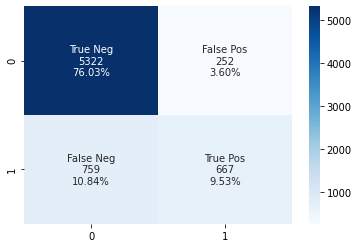

In [45]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()/np.sum(confusion_matrix(y_train, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=labels, fmt='', cmap='Blues')

# Decision tree

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
prec_decision_tree = round(precision_score(y_train,y_pred) * 100,2)
recall_decision_tree = round(recall_score(y_train,y_pred) * 100,2)
f1_decision_tree = round(f1_score(y_train,y_pred) * 100,2)
roc_auc_decision_tree = round(roc_auc_score(y_train,y_pred) * 100,2)

y_pred_test = decision_tree.predict(X_test)

acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)
prec_decision_tree_test = round(precision_score(y_test,y_pred_test) * 100,2)
recall_decision_tree_test = round(recall_score(y_test,y_pred_test) * 100,2)
f1_decision_tree_test = round(f1_score(y_test,y_pred_test) * 100,2)
roc_auc_decision_tree_test = round(roc_auc_score(y_test,y_pred_test) * 100,2)

In [47]:
print(acc_decision_tree)
print(prec_decision_tree)
print(recall_decision_tree)
print(f1_decision_tree)
print(roc_auc_decision_tree)

97.97
98.49
91.44
94.84
95.54


<AxesSubplot:>

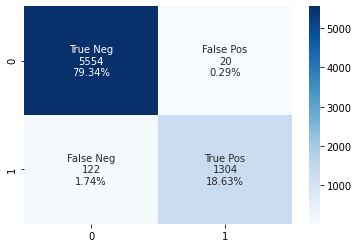

In [48]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()/np.sum(confusion_matrix(y_train, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=labels, fmt='', cmap='Blues')

# Random forest

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
prec_random_forest = round(precision_score(y_train,y_pred) * 100,2)
recall_random_forest = round(recall_score(y_train,y_pred) * 100,2)
f1_random_forest = round(f1_score(y_train,y_pred) * 100,2)
roc_auc_random_forest = round(roc_auc_score(y_train,y_pred) * 100,2)

y_pred_test = random_forest.predict(X_test)

acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
prec_random_forest_test = round(precision_score(y_test,y_pred_test) * 100,2)
recall_random_forest_test = round(recall_score(y_test,y_pred_test) * 100,2)
f1_random_forest_test = round(f1_score(y_test,y_pred_test) * 100,2)
roc_auc_random_forest_test = round(roc_auc_score(y_test,y_pred_test) * 100,2)

In [50]:
print(acc_random_forest)
print(prec_random_forest)
print(recall_random_forest)
print(f1_random_forest)
print(roc_auc_random_forest)

97.96
97.27
92.57
94.86
95.95


<AxesSubplot:>

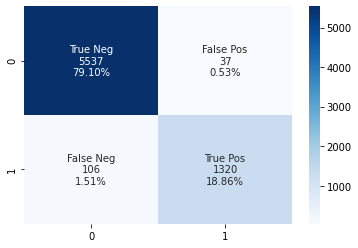

In [51]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred).flatten()/np.sum(confusion_matrix(y_train, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=labels, fmt='', cmap='Blues')

# XGBoost
Why and What is XBGoost?
<br>
More information: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/



In [52]:
# Define Model parameters to tune
model_parameters = { 
        'n_estimators':[10, 50, 100, 200, 500, 750, 100],
        'max_depth': [3, 5, 10],
        'min_samples_leaf': [np.random.randint(1,10)],
        'max_features': [None, 'sqrt', 'log2']
                  }

In [53]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='roc_auc')

gscv.fit(X_train, y_train)  ## Model building 

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  8.2min finished


[17:33:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [54]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 9, 'n_estimators': 50}


In [55]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

[17:33:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              max_features=None, min_child_weight=1, min_samples_leaf=9,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [56]:
# Prediction
train_pred = final_mod.predict(X_train)
test_pred = final_mod.predict(X_test)

In [57]:
acc_xgb = round(accuracy_score(y_train, train_pred) * 100, 2)
prec_xgb = round(precision_score(y_train, train_pred, average='macro') * 100, 2)
recall_xgb = round(recall_score(y_train, train_pred, average='macro') * 100, 2)
f1_xgb = round(f1_score(y_train, train_pred, average='macro') * 100, 2)
roc_auc_xgb = round(roc_auc_score(y_train, train_pred, average='macro') * 100, 2)

acc_xgb_test = round(accuracy_score(y_test, test_pred) * 100, 2)
prec_xgb_test = round(precision_score(y_test, test_pred, average='macro') * 100, 2)
recall_xgb_test = round(recall_score(y_test, test_pred, average='macro') * 100, 2)
f1_xgb_test = round(f1_score(y_test, test_pred, average='macro') * 100, 2)
roc_auc_xgb_test = round(roc_auc_score(y_test, test_pred, average='macro') * 100, 2)

<AxesSubplot:>

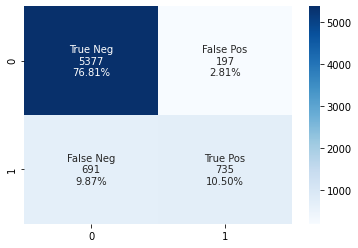

In [58]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, train_pred).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, train_pred).flatten()/np.sum(confusion_matrix(y_train, train_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, train_pred), annot=labels, fmt='', cmap='Blues')

# Step 3: Model Comparison

# Results - Using Training Data

In [59]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Gaussian NB','k-Nearest Neighbor','Decision Tree','Random Forest', 'XGBoost'],
    'Accuracy': [ acc_log, acc_gnb,acc_knn, acc_decision_tree, acc_random_forest, acc_xgb],
    'Precision': [prec_log, prec_gnb, prec_knn, prec_decision_tree, prec_random_forest, prec_xgb],
    'Recall': [recall_log, recall_gnb, recall_knn, recall_decision_tree, recall_random_forest, recall_xgb],
    'F1 Score': [f1_log, f1_gnb, f1_knn, f1_decision_tree, f1_random_forest, f1_xgb],
    'ROC-AUC': [roc_auc_log, roc_auc_gnb, roc_auc_knn, roc_auc_decision_tree, roc_auc_random_forest, roc_auc_xgb],
})
result_df = results.sort_values(by=['Accuracy','Recall','Precision','F1 Score'], ascending=[False,False,False,False])
result_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
3,Decision Tree,97.97,98.49,91.44,94.84,95.54
4,Random Forest,97.96,97.27,92.57,94.86,95.95
5,XGBoost,87.31,83.74,74.00,77.36,74.00
2,k-Nearest Neighbor,85.56,72.58,46.77,56.89,71.13
1,Gaussian NB,78.44,36.99,8.27,13.52,52.33
0,Logistic Regression,20.37,20.37,100.00,33.85,50.00


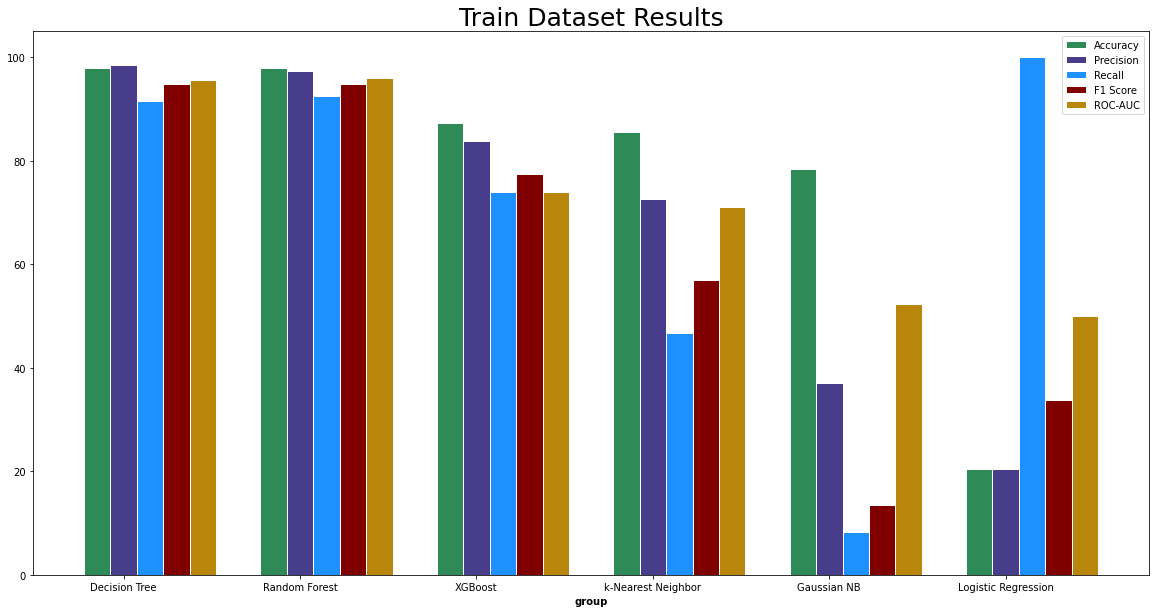

In [60]:
plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(result_df))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, result_df['Accuracy'], color= 'seagreen', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, result_df['Precision'], color= 'darkslateblue', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, result_df['Recall'], color= 'dodgerblue', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, result_df['F1 Score'], color= 'maroon', width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r5, result_df['ROC-AUC'], color= 'darkgoldenrod', width=barWidth, edgecolor='white', label='ROC-AUC')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(result_df))], result_df.Model)

# displaying the title 
plt.title(label='Train Dataset Results', 
          fontsize=25, 
          color="black") 
# Create legend & Show graphic
plt.legend()
plt.show()

# Results - Using Test Data

In [61]:
results_test = pd.DataFrame({
    'Model': ['Logistic Regression','Gaussian NB','k-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_log_test ,acc_gnb_test ,acc_knn_test ,acc_decision_tree_test ,acc_random_forest_test, acc_xgb_test],
    'Precision': [prec_log_test ,prec_gnb_test ,prec_knn_test ,prec_decision_tree_test ,prec_random_forest_test, prec_xgb_test],
    'Recall': [recall_log_test ,recall_gnb_test ,recall_knn_test ,recall_decision_tree_test ,recall_random_forest_test, recall_xgb_test],
    'F1 Score': [f1_log_test ,f1_gnb_test ,f1_knn_test ,f1_decision_tree_test ,f1_random_forest_test, f1_xgb_test],
    'ROC-AUC': [roc_auc_log_test ,roc_auc_gnb_test ,roc_auc_gnb_test ,roc_auc_decision_tree_test ,roc_auc_random_forest_test, roc_auc_xgb_test],
})
result_df_test = results_test.sort_values(by=['Accuracy','Recall','Precision','F1 Score'], ascending=[False,False,False,False])
result_df_test

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
5,XGBoost,86.40,82.23,72.03,75.36,72.03
4,Random Forest,83.87,63.37,49.26,55.43,70.99
3,Decision Tree,81.03,53.76,49.10,51.33,69.15
1,Gaussian NB,78.00,32.62,7.53,12.23,54.76
2,k-Nearest Neighbor,75.97,33.92,18.99,24.34,54.76
0,Logistic Regression,20.37,20.37,100.00,33.84,50.00


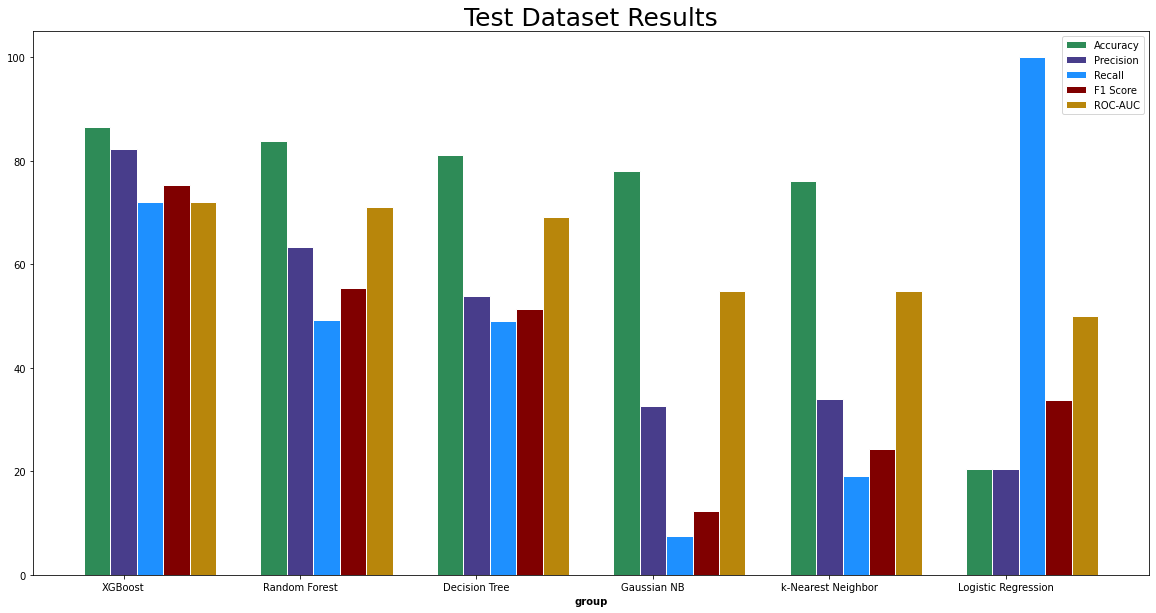

In [62]:
plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(result_df_test))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, result_df_test['Accuracy'], color= 'seagreen', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, result_df_test['Precision'], color= 'darkslateblue', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, result_df_test['Recall'], color= 'dodgerblue', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, result_df_test['F1 Score'], color= 'maroon', width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r5, result_df_test['ROC-AUC'], color= 'darkgoldenrod', width=barWidth, edgecolor='white', label='ROC-AUC')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(result_df_test))], result_df_test.Model)

# displaying the title 
plt.title(label='Test Dataset Results', 
          fontsize=25, 
          color="black") 
# Create legend & Show graphic
plt.legend()
plt.show()

## What do these scores mean?
### Lets look at the meaning and calculations of all these evaluation parameters.
#### Accuracy:
Accuracy calculates the total number of instances where prediction was correctly made as positive or negative compared to total number of observations.
-Most useful when the data is balanced
What to do if in this case model classifies all as **Not Exited**? Since almost 80% of our data is that of customers **Not Exited**, if all customers are labeled as **Not Exited**, the model will fail its purpose. To mitigate this issue, we look at other parameters.

#### Overall Accuracy = (TN+TP)/N

#### Precision:
Precision calculates the total instances where out of those predicted as positive, how many of them are actual positive. The question that this metric answer is of all customers that labeled as Exited, how many actually Exited?

####Recall (a.k.a. Sensitivity or True Positive Rate):
Recall calculates the total number of instances where prediction was correctly made as positive compared to total number of actual positive observations in the data. The question recall answers is: Of all the customers that actually Exited, how many did we label correctly?

This is even more important in cases like Spam filteration where user can miss an email if it is mistakenly classified as spam.

#### Sensitivity = TP/(TP+FN)

#### F1 Score or F-Beta Score:
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 Score is needed when you want to seek a balance between Precision and Recall.

#### ROC - AUC:
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

#### More Information:
https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021
<br>
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
<br>
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

# Step 4: Further Tuning Hyperparameters
## Logistic Regression - Tuning

In [63]:
logopt1 = LogisticRegression()

In [64]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [65]:
clf = GridSearchCV(logopt1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [66]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 4090 tasks      | elapsed: 47.6min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 54.8min finished


In [67]:
best_clf.best_estimator_

LogisticRegression(C=0.03359818286283781, max_iter=5000, penalty='l1',
                   solver='liblinear')

In [68]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.813


In [69]:
logopt2 = LogisticRegression(C=0.03359818286283781, max_iter=2500, penalty='l1',solver='liblinear')

In [70]:
logopt2.fit(X_train,y_train)

LogisticRegression(C=0.03359818286283781, max_iter=2500, penalty='l1',
                   solver='liblinear')

In [71]:
train_lr_pred = logopt2.predict(X_train)
test_lr_pred = logopt2.predict(X_test)

In [72]:
acc_lropt2 = round(accuracy_score(y_train, train_lr_pred) * 100, 2)
prec_lropt2 = round(precision_score(y_train, train_lr_pred, average='macro') * 100, 2)
recall_lropt2 = round(recall_score(y_train, train_lr_pred, average='macro') * 100, 2)
f1_lropt2 = round(f1_score(y_train, train_lr_pred, average='macro') * 100, 2)
roc_auc_lropt2 = round(roc_auc_score(y_train, train_lr_pred, average='macro') * 100, 2)

acc_lropt2_test = round(accuracy_score(y_test, test_lr_pred) * 100, 2)
prec_lropt2_test = round(precision_score(y_test, test_lr_pred, average='macro') * 100, 2)
recall_lropt2_test = round(recall_score(y_test, test_lr_pred, average='macro') * 100, 2)
f1_lropt2_test = round(f1_score(y_test, test_lr_pred, average='macro') * 100, 2)
roc_auc_lropt2_test = round(roc_auc_score(y_test, test_lr_pred, average='macro') * 100, 2)

In [73]:
optres = pd.DataFrame({
    'Parameter': ['Accuracy','Precision','Recall', 'F1 Score', 'ROC-AUC'],
    'Optimised on Train': [acc_lropt2 ,prec_lropt2 ,recall_lropt2 ,f1_lropt2 ,roc_auc_lropt2],
    'Optimised on Test': [acc_lropt2_test ,prec_lropt2_test ,recall_lropt2_test ,f1_lropt2_test ,roc_auc_lropt2_test],
    'Original on Train': [acc_log ,prec_log ,recall_log ,f1_log ,roc_auc_log],
    'Original on Test': [acc_log_test ,prec_log_test ,recall_log_test ,f1_log_test ,roc_auc_log_test]
})
# result_df_test = results_test.sort_values(by=['Accuracy','Recall','Precision','F1 Score'], ascending=[False,False,False,False])
optres

,Parameter,Optimised on Train,Optimised on Test,Original on Train,Original on Test
0,Accuracy,81.41,81.10,20.37,20.37
1,Precision,74.30,72.84,20.37,20.37
2,Recall,57.75,57.19,100.00,100.00
3,F1 Score,58.71,57.90,33.85,33.84
4,ROC-AUC,57.75,57.19,50.00,50.00


In [74]:
logopt3 = LogisticRegression(C=0.03359818286283781, max_iter=2500, penalty='l2',solver='newton-cg')
logopt3.fit(X_train,y_train)
train_lr_pred = logopt3.predict(X_train)
test_lr_pred = logopt3.predict(X_test)

acc_lropt3 = round(accuracy_score(y_train, train_lr_pred) * 100, 2)
prec_lropt3 = round(precision_score(y_train, train_lr_pred, average='macro') * 100, 2)
recall_lropt3 = round(recall_score(y_train, train_lr_pred, average='macro') * 100, 2)
f1_lropt3 = round(f1_score(y_train, train_lr_pred, average='macro') * 100, 2)
roc_auc_lropt3 = round(roc_auc_score(y_train, train_lr_pred, average='macro') * 100, 2)

acc_lropt3_test = round(accuracy_score(y_test, test_lr_pred) * 100, 2)
prec_lropt3_test = round(precision_score(y_test, test_lr_pred, average='macro') * 100, 2)
recall_lropt3_test = round(recall_score(y_test, test_lr_pred, average='macro') * 100, 2)
f1_lropt3_test = round(f1_score(y_test, test_lr_pred, average='macro') * 100, 2)
roc_auc_lropt3_test = round(roc_auc_score(y_test, test_lr_pred, average='macro') * 100, 2)

optres3 = pd.DataFrame({
    'Parameter': ['Accuracy','Precision','Recall', 'F1 Score', 'ROC-AUC'],
    'Optimised Newton CG Solver L2 on Train': [acc_lropt3 ,prec_lropt3 ,recall_lropt3 ,f1_lropt3 ,roc_auc_lropt3],
    'Optimised Newton CG Solver L2 on Test': [acc_lropt3_test ,prec_lropt3_test ,recall_lropt3_test ,f1_lropt3_test ,roc_auc_lropt3_test],
    'Optimised liblinear Solver L1 on Train': [acc_lropt2 ,prec_lropt2 ,recall_lropt2 ,f1_lropt2 ,roc_auc_lropt2],
    'Optimised liblinear Solver L1 on Test': [acc_lropt2_test ,prec_lropt2_test ,recall_lropt2_test ,f1_lropt2_test ,roc_auc_lropt2_test],
    'Original on Train': [acc_log ,prec_log ,recall_log ,f1_log ,roc_auc_log],
    'Original on Test': [acc_log_test ,prec_log_test ,recall_log_test ,f1_log_test ,roc_auc_log_test]
})
# result_df_test = results_test.sort_values(by=['Accuracy','Recall','Precision','F1 Score'], ascending=[False,False,False,False])
optres3

C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\madha\anaconda3\envs\Python 37\lib\site-packages\scipy\optimize\linesearch.py:477: Line

,Parameter,Optimised Newton CG Solver L2 on Train,Optimised Newton CG Solver L2 on Test,Optimised liblinear Solver L1 on Train,Optimised liblinear Solver L1 on Test,Original on Train,Original on Test
0,Accuracy,81.21,80.90,81.41,81.10,20.37,20.37
1,Precision,72.06,70.83,74.30,72.84,20.37,20.37
2,Recall,58.77,58.29,57.75,57.19,100.00,100.00
3,F1 Score,60.16,59.49,58.71,57.90,33.85,33.84
4,ROC-AUC,58.77,58.29,57.75,57.19,50.00,50.00


**As we can see the Logistic Regression model Optimised using the best estimators provided by GridSearchCV has performed the best. We can tweak futher but we can only improve certain parameters but that might cause reduction in performance in other parameters**